<a href="https://colab.research.google.com/github/orlandxrf/escuela-verano/blob/main/4_0_Escuela_Verano_Extraccion_Informacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/img/logos.png" height="100" />

<h1>Escuela de verano del Laboratorio de Estructuras y Dinámicas Sociales</h1>
Escuela de Verano, 25-28 de Junio de 2024
<hr>
<h2><strong>Descubre el poder del PLN: aprende a pre-procesar, analizar y extraer información de textos<strong></h2>
<hr>

# Extracción de información 1

La Extracción de Información (EI) en el Procesamiento del Lenguaje Natural (PLN) se refiere a la tarea automatizada de identificar y extraer datos relevantes y estructurados a partir de grandes volúmenes de texto no estructurado. Esto implica localizar entidades como nombres de personas, lugares, organizaciones y fechas, así como las relaciones que existen entre ellas. La información extraída se puede organizar en formatos como bases de datos o tablas, facilitando su análisis y posterior utilización en diversas aplicaciones.

## Obtener archivos

Para este taller se almacenan los archivos en [Github](https://github.com/orlandxrf/escuela-verano) adicional a todo el material usado.

Para evitar subir los archivos a Google Colab cada vez que se quiera trabajar con el Notebook, se realizará el proceso de forma automática. Para la descarga de los archivos se utiliza el comando `wget`

**Wget**, que significa "World Wide Web GET", es una utilidad de línea de comandos en sistemas operativos tipo Unix, como Linux, que se utiliza para descargar archivos de la web. Es una herramienta poderosa y versátil que permite descargar una amplia variedad de contenido.

La sintaxis para descargar un archivo es la siguiente:

```bash
!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/El_maravilloso_Mago_de_Oz.pdf
```

El resultado esperado por cada archivo descargado es similar al siguiente

```bash
--2024-06-22 18:35:06--  https://github.com/orlandxrf/escuela-verano/blob/main/data/El_maravilloso_Mago_de_Oz.pdf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/El_maravilloso_Mago_de_Oz.pdf’

El_maravilloso_Mago     [ <=>                ] 241.79K  --.-KB/s    in 0.03s   

2024-06-22 18:35:06 (8.05 MB/s) - ‘data/El_maravilloso_Mago_de_Oz.pdf’ saved [247596]
```

Es importante señalar que si la carpeta donde se desea almacenar el archivo no existe, se crea. En caso de descargar el archivo cuando previamente existe, lo que ocurre es que se sobre escribe el archivo descargado, es decir el archivo descargado reemplaza al previo, siempre y cuando tengan el mismo nombre.

In [ ]:
# descargar los archivos utilizando "wget"

#!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/Escuela_de_verano.txt
#!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/Los_Caudillos_de_1830.txt
!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/Los_Caudillos_de_1830.csv
!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/ia_tweets.csv
#!wget -P data/fake_news/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/fake_news/dev.xlsx
#!wget -P data/fake_news/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/fake_news/train.xlsx
#!wget -P data/fake_news/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/fake_news/test.xlsx
#!wget -P data/ https://github.com/orlandxrf/escuela-verano/blob/main/data/El_maravilloso_Mago_de_Oz.pdf

--2024-06-23 21:13:24--  https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/Los_Caudillos_de_1830.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234389 (229K) [text/plain]
Saving to: ‘data/Los_Caudillos_de_1830.csv’

Los_Caudillos_de_18 100%[===================>] 228.90K  --.-KB/s    in 0.04s   

2024-06-23 21:13:24 (6.20 MB/s) - ‘data/Los_Caudillos_de_1830.csv’ saved [234389/234389]

--2024-06-23 21:13:24--  https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/ia_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, await

## 2. Cargar datos del archivo

Leer el archivo a *preprocesar*, si es un archivo de texto plano (`.txt`) leer el archivo y almacenar el contenido en una estructura de Python (lista o diccionario).

En caso de leer un archivo estructurado con formato `.csv` o `.tsv` utilizar la biblioteca `pandas` para la obtención de la información del archivo.

In [ ]:
import pandas as pd

ruta_archivo = "data/Los_Caudillos_de_1830.csv"

# cargar el archivo en un DataFrame
df = pd.read_csv(ruta_archivo)

## Colocaciones

En el ámbito del PLN, las colocaciones son combinaciones de palabras que aparecen juntas con mayor frecuencia de lo que se esperaría por azar.

Estas combinaciones suelen tener un significado particular cuando se usan juntas y pueden incluir estructuras como:

* `adjetivo` + `sustantivo` (**"alta montaña"**)
* `verbo` + `sustantivo` (**"tomar decisiones"**)

En PLN, las colocaciones pueden identificarse mediante patrones de etiquetas de partes del discurso (POS). Algunos patrones comunes de colocaciones incluyen:

* `Adjetivo` + `Sustantivo` (**ADJ + NOUN**)
* `Sustantivo` + `Sustantivo` (**NOUN + NOUN**)
* `Verbo` + `Sustantivo` (**VERB + NOUN**)
* `Sustantivo` + `Verbo` (**NOUN + VERB**)
* `Sustantivo` + `Preposición` + `Sustantivo` (**NOUN + ADP + NOUN**)


### Identificación de colocaciones


In [ ]:
# descargar el modelo pequeño en español de Spacy
!python -m spacy download es_core_news_sm

In [ ]:
import spacy
from collections import Counter
from spacy.matcher import Matcher

# Cargar el modelo de Spacy para español
nlp = spacy.load('es_core_news_sm')

# Definir los patrones de colocaciones
patterns = [
    {"label": "ADJ_NOUN", "pattern": [{"POS": "ADJ"}, {"POS": "NOUN"}]},
    {"label": "NOUN_NOUN", "pattern": [{"POS": "NOUN"}, {"POS": "NOUN"}]},
    {"label": "VERB_NOUN", "pattern": [{"POS": "VERB"}, {"POS": "NOUN"}]},
    {"label": "NOUN_VERB", "pattern": [{"POS": "NOUN"}, {"POS": "VERB"}]},
    {"label": "NOUN_ADP_NOUN", "pattern": [{"POS": "NOUN"}, {"POS": "ADP"}, {"POS": "NOUN"}]},
]

# Crear el matcher y agregar los patrones
matcher = Matcher(nlp.vocab)
for pattern in patterns:
    matcher.add(pattern["label"], [pattern["pattern"]])

# Función para identificar y contar colocaciones
def identificar_colocaciones(texto):
    doc = nlp(texto, disable=["ner"])
    matches = matcher(doc)
    colocaciones = []

    for match_id, start, end in matches:
        span = doc[start:end]
        colocaciones.append((span.text, nlp.vocab.strings[match_id]))

    # Contar las colocaciones
    colocaciones_counter = Counter(colocaciones)

    # Imprimir las colocaciones más comunes
    #for (text, label), count in colocaciones_counter.most_common():
    #    print(f"{text} ({label}): {count}")
    return colocaciones_counter.most_common()

# Ejemplo de uso
texto = "El rápido zorro marrón salta sobre el perro perezoso. Tomar decisiones importantes es crucial."
identificar_colocaciones(texto)


[(('rápido zorro', 'ADJ_NOUN'), 1), (('Tomar decisiones', 'VERB_NOUN'), 1)]

### Obtener colocaciones

Del libro "Los Caudillos de 1838" previamente procesado y almacenado en el Notebook anterior, identificar las colocaciones con el método `identificar_colocaciones`.

In [ ]:
# identifcar todas las colocaciones con el método "identificar_colocaciones"
# de la columna "texto" del DataFrame

# concatenar todos los renglones de la columna "texto" del DataFrame
texto_concatenado = " ".join(df["texto"].tolist())

# identificar las colocaciones del texto concatenado
colocaciones = identificar_colocaciones(texto_concatenado)


colocaciones_dict = {
    "colocacion": [],
    "patron": [],
    "frecuencia": [],
}

# agregar las colocaciones a un diccionario
for (text, label), count in colocaciones:
    colocaciones_dict["colocacion"].append(text)
    colocaciones_dict["patron"].append(label)
    colocaciones_dict["frecuencia"].append(count)

# crear un DataFrame a partir del diccionario
colocaciones_df = pd.DataFrame(colocaciones_dict)

# mostrar el DataFrame
colocaciones_df

,colocacion,patron,frecuencia
0,mismo tiempo,ADJ_NOUN,7
1,largo tiempo,ADJ_NOUN,5
2,cuarto de hora,NOUN_ADP_NOUN,5
3,orilla del río,NOUN_ADP_NOUN,4
4,carta de seguridad,NOUN_ADP_NOUN,3
...,...,...,...
1345,nefasto dragón,ADJ_NOUN,1
1346,viejo basilisco,ADJ_NOUN,1
1347,auxiliar del destino,NOUN_ADP_NOUN,1
1348,caza del dragón,NOUN_ADP_NOUN,1


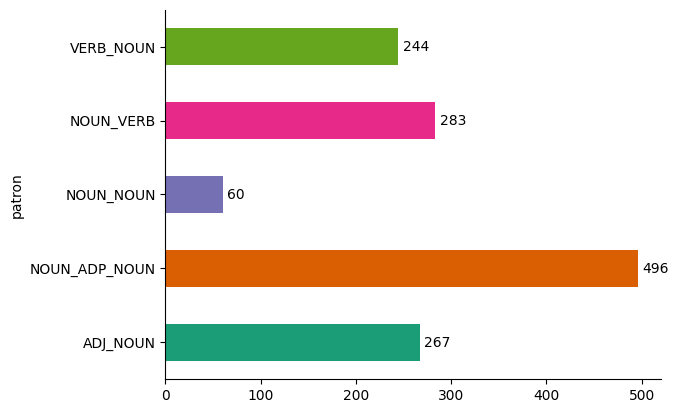

In [ ]:
# @title Patrones identificados

from matplotlib import pyplot as plt
import seaborn as sns
colocaciones_df.groupby('patron').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# agregar el valor total en la cima de cada barra
for i, v in enumerate(colocaciones_df.groupby('patron').size()):
    plt.text(v+5, i, str(v), color='black', va='center')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Obtener colocaciones (Ejercicio)

Obtener colocaciones del conjunto de tweets, usar n-gramas para la identificación.

In [ ]:
# archivo de tweets que hablan sobre IA
ruta_archivo = "data/ia_tweets.csv"

# cargar el archivo en un DataFrame
df = pd.read_csv(ruta_archivo)

# imprimir la cantidad de tweets
print(f"Cantidad de tweets: {len(df):,}")


Cantidad de tweets: 4,038


#### Limpieza de tweets

Las expresiones regulares (**regex**) son secuencias de caracteres que forman un patrón de búsqueda. Son muy útiles para la manipulación y búsqueda de textos, como en la limpieza de datos de texto, incluyendo tweets.

En el contexto de la limpieza de tweets, las expresiones regulares pueden ayudar a:

1. **Eliminar URLs**: Los tweets a menudo contienen enlaces que no son útiles para el análisis de texto.
2. **Eliminar menciones**: Las menciones (@usuario) pueden ser irrelevantes para ciertos análisis.
3. **Eliminar hashtags**: Los hashtags (#hashtag) pueden o no ser útiles, dependiendo del análisis.
4. **Eliminar caracteres especiales y puntuación**: Para simplificar el texto.
5. **Eliminar números**: A veces, los números no son relevantes para el análisis.
6. **Eliminar espacios adicionales**: Para limpiar el texto

In [ ]:
# limpiar los tweets de urls, hastags, usernames y caracteres especiales con
# expresiones regulares

import re

def limpiar_tweet(tweet):
    # Eliminar URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Eliminar menciones (@usuario)
    tweet = re.sub(r'@\w+', '', tweet)

    # Eliminar hashtags (#hashtag)
    tweet = re.sub(r'#\w+', '', tweet)

    # Eliminar caracteres especiales y puntuación
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Eliminar números
    tweet = re.sub(r'\d+', '', tweet)

    # Eliminar espacios adicionales
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    return tweet

# limpiar los tweets del DataFrame
df_tweets = pd.DataFrame(df["text"].apply(limpiar_tweet))

print(f"Cantidad de tweets: {len(df_tweets):,}")

# eliminar renglones vacíos despues de la limpieza
df_tweets = df_tweets[df_tweets["text"] != ""]

print(f"Cantidad de tweets sin renglones vacíos: {len(df_tweets):,}")

# mostrar el DataFrame
df_tweets


Cantidad de tweets: 4,038
Cantidad de tweets sin renglones vacíos: 3,925


,text
0,Comentaba en una charla sobre IA que el proble...
1,Eso es imposible Y sí va a generar un montón d...
2,Lo disruptivo es que tras años de decir que la...
3,Prohibición del uso comercial de las imágenes ...
4,Cómo se está estudiando prohibir chatGPT en Eu...
...,...
4033,INNOVACIÓN Puede un chatbot predicar mejor que...
4034,Sería mejor por que no abusaría de niños
4035,Ejemplo el uso estratégico de tener datos está...
4036,X estás mal y ngmi porque esto es el futuro Yo...


#### Utilizar n-gramas

En el ámbito del PLN, los **n-gramas** son unidades lingüísticas que se componen de secuencias de **n** elementos contiguos extraídos de un texto. El valor de **n** determina el tipo de **n-grama**:

* **Unigrama**: Secuencia de una palabra. Ejemplo: "la", "casa", "del".
* **Bigrama**: Secuencia de dos palabras. Ejemplo: "la casa", "del perro", "comer pizza".
* **Trigrama**: Secuencia de tres palabras. Ejemplo: "la casa del perro", "comer pizza en el parque", "estudiar para el examen".
* **Cuatrigrama**: Secuencia de cuatro palabras. Ejemplo: "la casa del perro de mi abuela", "comer pizza en el parque con amigos", "estudiar para el examen de mañana".

Los **n-gramas** se utilizan para crear modelos de lenguaje estadísticos que predicen la siguiente palabra en una secuencia dada. Estos modelos se basan en la idea de que la probabilidad de que una palabra aparezca en un texto depende de las palabras que la preceden.

In [ ]:
# definir un método que acepte el texto y el "n" grama, devolviendo los ngramas calculados
def ngramas(texto, n):
    return list(zip(*[texto[i:] for i in range(n)]))

# obtener los bi-gramas, tri-gramas y cuatri-gramas de cada tweet
df_tweets["bi-gramas"] = df_tweets["text"].apply(lambda x: ngramas(x.split(), 2))
df_tweets["tri-gramas"] = df_tweets["text"].apply(lambda x: ngramas(x.split(), 3))
df_tweets["cuatri-gramas"] = df_tweets["text"].apply(lambda x: ngramas(x.split(), 4))

# mostrar el DataFrame
# df_tweets

,text,bi-gramas,tri-gramas,cuatri-gramas
0,Comentaba en una charla sobre IA que el proble...,"[(Comentaba, en), (en, una), (una, charla), (c...","[(Comentaba, en, una), (en, una, charla), (una...","[(Comentaba, en, una, charla), (en, una, charl..."
1,Eso es imposible Y sí va a generar un montón d...,"[(Eso, es), (es, imposible), (imposible, Y), (...","[(Eso, es, imposible), (es, imposible, Y), (im...","[(Eso, es, imposible, Y), (es, imposible, Y, s..."
2,Lo disruptivo es que tras años de decir que la...,"[(Lo, disruptivo), (disruptivo, es), (es, que)...","[(Lo, disruptivo, es), (disruptivo, es, que), ...","[(Lo, disruptivo, es, que), (disruptivo, es, q..."
3,Prohibición del uso comercial de las imágenes ...,"[(Prohibición, del), (del, uso), (uso, comerci...","[(Prohibición, del, uso), (del, uso, comercial...","[(Prohibición, del, uso, comercial), (del, uso..."
4,Cómo se está estudiando prohibir chatGPT en Eu...,"[(Cómo, se), (se, está), (está, estudiando), (...","[(Cómo, se, está), (se, está, estudiando), (es...","[(Cómo, se, está, estudiando), (se, está, estu..."
...,...,...,...,...
4033,INNOVACIÓN Puede un chatbot predicar mejor que...,"[(INNOVACIÓN, Puede), (Puede, un), (un, chatbo...","[(INNOVACIÓN, Puede, un), (Puede, un, chatbot)...","[(INNOVACIÓN, Puede, un, chatbot), (Puede, un,..."
4034,Sería mejor por que no abusaría de niños,"[(Sería, mejor), (mejor, por), (por, que), (qu...","[(Sería, mejor, por), (mejor, por, que), (por,...","[(Sería, mejor, por, que), (mejor, por, que, n..."
4035,Ejemplo el uso estratégico de tener datos está...,"[(Ejemplo, el), (el, uso), (uso, estratégico),...","[(Ejemplo, el, uso), (el, uso, estratégico), (...","[(Ejemplo, el, uso, estratégico), (el, uso, es..."
4036,X estás mal y ngmi porque esto es el futuro Yo...,"[(X, estás), (estás, mal), (mal, y), (y, ngmi)...","[(X, estás, mal), (estás, mal, y), (mal, y, ng...","[(X, estás, mal, y), (estás, mal, y, ngmi), (m..."


In [ ]:
# obtener los bi-gramas más frecuentes de la columna "bi-gramas" del DataFrame df_tweets
bi_gramas_frecuentes = Counter()
for bi_gramas in df_tweets["bi-gramas"]:
    bi_gramas_frecuentes.update(bi_gramas)

print("Los 10 bi-gramas más frecuentes son:")
for bi_grama, frecuencia in bi_gramas_frecuentes.most_common(37):
    print(f"{bi_grama}: {frecuencia}")

Los 10 bi-gramas más frecuentes son:
('de', 'la'): 767
('inteligencia', 'artificial'): 548
('en', 'el'): 328
('la', 'IA'): 318
('en', 'la'): 299
('de', 'los'): 256
('lo', 'que'): 253
('a', 'la'): 251
('la', 'inteligencia'): 248
('Inteligencia', 'Artificial'): 227
('y', 'la'): 211
('que', 'la'): 183
('que', 'se'): 180
('uso', 'de'): 173
('de', 'las'): 172
('que', 'no'): 162
('de', 'ChatGPT'): 137
('a', 'los'): 135
('de', 'inteligencia'): 133
('de', 'datos'): 130
('el', 'uso'): 121
('con', 'la'): 119
('y', 'el'): 116
('no', 'es'): 106
('de', 'IA'): 99
('la', 'Inteligencia'): 98
('es', 'una'): 97
('a', 'las'): 94
('es', 'que'): 87
('es', 'un'): 87
('con', 'el'): 86
('para', 'la'): 85
('va', 'a'): 84
('que', 'el'): 81
('que', 'es'): 80
('la', 'tecnología'): 79
('Elon', 'Musk'): 77


#### Patrones POS

In [ ]:
# concatenar texto de tweets
texto_tweets = " ".join(df_tweets["text"].tolist())

# identificar las colocaciones del texto concatenado
colocaciones_tweets = identificar_colocaciones(texto_tweets)

In [ ]:
colocaciones_tweets_dict = {
    "colocacion": [],
    "patron": [],
    "frecuencia": [],
}

# agregar las colocaciones a un diccionario
for (text, label), count in colocaciones_tweets:
    colocaciones_tweets_dict["colocacion"].append(text)
    colocaciones_tweets_dict["patron"].append(label)
    colocaciones_tweets_dict["frecuencia"].append(count)

# crear un DataFrame a partir del diccionario
colocaciones_tweets_df = pd.DataFrame(colocaciones_tweets_dict)

# mostrar el DataFrame
colocaciones_tweets_df

,colocacion,patron,frecuencia
0,Esperando resultados,VERB_NOUN,48
1,resultados de prueba,NOUN_ADP_NOUN,48
2,prueba de vuelo,NOUN_ADP_NOUN,48
3,protección de datos,NOUN_ADP_NOUN,30
4,modelo de lenguaje,NOUN_ADP_NOUN,21
...,...,...,...
5891,usa técnicas,VERB_NOUN,1
5892,tomar años,VERB_NOUN,1
5893,modo X,NOUN_NOUN,1
5894,habemos gente,VERB_NOUN,1


#### Colocaciones específicas

Para identificar nombres de personas, organizaciones y lugares, así como relaciones familiares, utilizando patrones de Part-of-Speech (POS) tagging, se pueden emplear ciertas etiquetas comunes en los sistemas de etiquetado POS como las que ofrece el modelo SpaCy en español.

A continuación, se detallan algunos patrones para cada categoría mencionada:

1. **Nombres de Personas**. Los nombres de personas suelen ser sustantivos propios (PROPN) y pueden estar precedidos por títulos (NOUN). Los apellidos también son sustantivos propios. Ejemplos de patrones:

  * **PROPN PROPN**: Puede identificar nombres y apellidos. Ejemplo: **"Juan Pérez"**
  * **PROPN PROPN PROPN**: Puede identificar nombres compuestos y apellidos.Ejemplo: **"Juan Pérez Pérez"**
2. **Nombres de Organizaciones**. Las organizaciones suelen estar formadas por una secuencia de sustantivos propios (PROPN) y sustantivos comunes (NOUN). Ejemplos de patrones:

  * **PROPN NOUN**: Puede identificar una organización con nombre y tipo. Ejemplo: **"Microsoft Corporation"**
  * **PROPN PROPN NOUN**: Para organizaciones con nombres compuestos. Ejemplo: **"Universidad Nacional Autónoma"**
3. **Nombres de Lugares**. Los lugares también suelen ser sustantivos propios (PROPN) y pueden estar acompañados por sustantivos comunes (NOUN). Ejemplos de patrones:

  * **PROPN**: Un solo nombre propio. Ejemplo: **"México"**
  * **PROPN PROPN**: Para nombres compuestos. Ejemplo: **"San Luis"**
  * **PROPN NOUN**: Nombre de lugar y tipo. Ejemplo: **"Río Amazonas"**

**Patrones POS para Identificar Relaciones Familiares**

Las relaciones familiares pueden ser identificadas utilizando sustantivos (NOUN) que denotan relaciones y pueden estar acompañados por posesivos (DET) y pronombres (PRON). Ejemplos de patrones:

* **DET NOUN**: Para relaciones familiares posesivas. Ejemplo: **"mi hermano"**
* **PRON NOUN**: Relaciones con pronombres. Ejemplo: **"su madre"**
* **PROPN NOUN**: Relación familiar con nombres propios. Ejemplo: **"Juan padre"**
* **NOUN PROPN**: Relación inversa (padre Juan). Ejemplo: **"hermana Ana"**


In [ ]:
# Ejemplo de texto
texto = "Juan Pérez es el director de Microsoft Corporation. Vive en Ciudad de México con su esposa María y su hermano Carlos."

# Procesar el texto
doc = nlp(texto)

# Definir patrones
patrones = [
    {"label": "PERSONA", "pattern": [{"POS": "PROPN"}, {"POS": "PROPN"}]},
    {"label": "ORGANIZACIÓN", "pattern": [{"POS": "PROPN"}, {"POS": "NOUN"}]},
    {"label": "LUGAR", "pattern": [{"POS": "PROPN"}, {"POS": "PROPN"}]},
    {"label": "REL_FAMILIAR", "pattern": [{"POS": "DET"}, {"POS": "NOUN"}]},
    {"label": "REL_FAMILIAR", "pattern": [{"POS": "PRON"}, {"POS": "NOUN"}]},
]

# Crear un matcher y añadir patrones
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
for patron in patrones:
    matcher.add(patron["label"], [patron["pattern"]])

# Buscar patrones en el texto
matches = matcher(doc)

# Mostrar resultados
for match_id, start, end in matches:
    span = doc[start:end]
    label = nlp.vocab.strings[match_id]  # obtener etiqueta de la coincidencia
    print(f"{label}: {span.text}")


PERSONA: Juan Pérez
LUGAR: Juan Pérez
REL_FAMILIAR: el director
PERSONA: Microsoft Corporation
LUGAR: Microsoft Corporation
REL_FAMILIAR: su esposa
REL_FAMILIAR: su hermano


In [ ]:
# Ejercicio
# aplicar los patrones para identificar nombres de personas, organizaciones,
# lugares y relaciones familiares al libro "Los Caudillos de 1838"


## Reconocimiento de Entidades Nombradas

Las Coloquaciones como el Reconocimiento de Entidades Nombradas (NER) son tareas de PLN que se utilizan para identificar información relevante dentro de un texto. Sin embargo, existen algunas diferencias clave entre ambas:

### Coloquaciones:

* Se enfocan en identificar pares o grupos de palabras que frecuentemente aparecen juntas en un contexto específico.
* Las coloquaciones no se limitan a entidades nombradas, sino que pueden incluir cualquier tipo de palabra o frase.
* Se utilizan para comprender mejor el significado del texto y para detectar patrones de lenguaje.
* Son útiles para tareas como la extracción de información, la traducción automática y la redacción de textos.

### Reconocimiento de Entidades Nombradas (NER):

* Se centra en identificar entidades nombradas dentro de un texto, como personas, lugares, organizaciones, fechas, etc.
* Cada entidad nombrada se clasifica en una categoría predefinida.
* Se utiliza para extraer información estructurada de un texto, como para crear bases de datos o alimentar sistemas de inteligencia artificial.
* Es útil para tareas como la búsqueda de información, el análisis de sentimientos y la asistencia virtual.

En resumen, las coloquaciones se utilizan para identificar patrones de lenguaje y comprender mejor el significado del texto, mientras que el NER se utiliza para extraer información estructurada de un texto. La elección de cuál usar dependerá de la tarea específica que se esté realizando.

In [ ]:
# Texto en español para analizar e identificar Entidades Nombradas
texto = "Pedro Sánchez es el presidente del gobierno de España y vive en Madrid."

# Procesamiento del texto
doc = nlp(texto)

# Imprimir entidades reconocidas
for entidad in doc.ents:
    print(entidad.text, entidad.label_)


Pedro Sánchez PER
España LOC
Madrid LOC


### NER aplicado a tweets

In [ ]:
doc = nlp(texto_tweets)

tweets_entity = {
  "entidad": [],
  "tipo": [],
}

# Imprimir entidades reconocidas
for entidad in doc.ents:
    tweets_entity["entidad"].append(entidad.text)
    tweets_entity["tipo"].append(entidad.label_)


# crear DataFrame con las entidades identificadas
df_tweets_entity = pd.DataFrame(tweets_entity)

# mostrar el DataFrame
df_tweets_entity


,entidad,tipo
0,IA Eso,MISC
1,Chat GPT,MISC
2,Lo disruptivo,MISC
3,Prohibición del uso comercial,MISC
4,IA Me,MISC
...,...,...
7900,Además,PER
7901,Yo Sí,ORG
7902,Yo Solo,PER
7903,AILLMs hype Está,MISC
